In [1]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

plt.style.use('../style.mpl')
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


In [62]:
assortativity = nx.numeric_assortativity_coefficient(G, 'frequency')
print(f"Assortativity coefficient (by frequency): {assortativity:.4f}")

degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree assortativity: {degree_assortativity:.4f}")

mixing_matrix = nx.degree_mixing_matrix(G, normalized=True)

Assortativity coefficient (by frequency): 0.1231
Degree assortativity: 0.1254


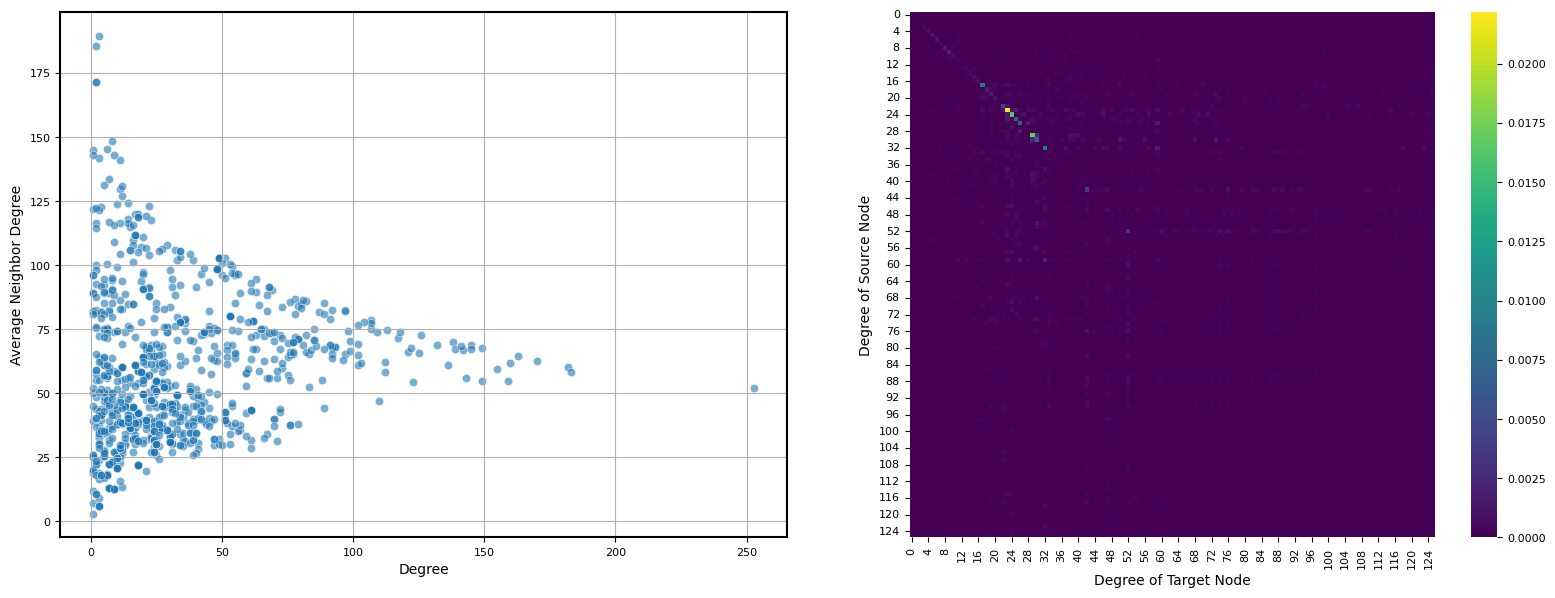

In [60]:
degrees = dict(G.degree())
avg_neighbor_deg = nx.average_neighbor_degree(G)

x = list(degrees.values())
y = [avg_neighbor_deg[n] for n in G.nodes()]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=x, y=y, alpha=0.6, ax=ax[0])
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Average Neighbor Degree")
ax[0].grid(True)

sns.heatmap(mixing_matrix, cmap='viridis', square=True, ax=ax[1])
ax[1].set_xlabel('Degree of Target Node')
ax[1].set_ylabel('Degree of Source Node')

plt.tight_layout()
plt.savefig("../plots/assortativity.png", transparent=True)
plt.show()
